In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path='/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset'
train_dir='/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Train'
test_dir='/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Val'
print(len(os.listdir(train_dir)))

2


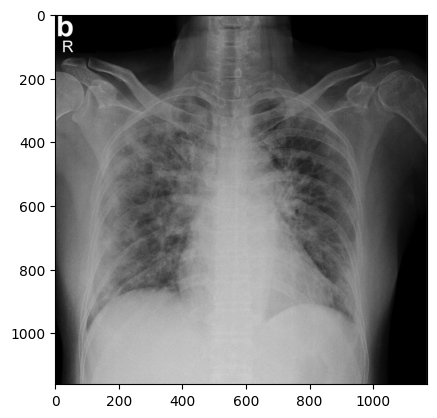

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
path_1='/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Train/Covid/'
img=path_1+'1-s2.0-S0929664620300449-gr2_lrg-b.jpg'
img=mpimg.imread(img)
plt.imshow(img,cmap='gray')

(1109, 1466)


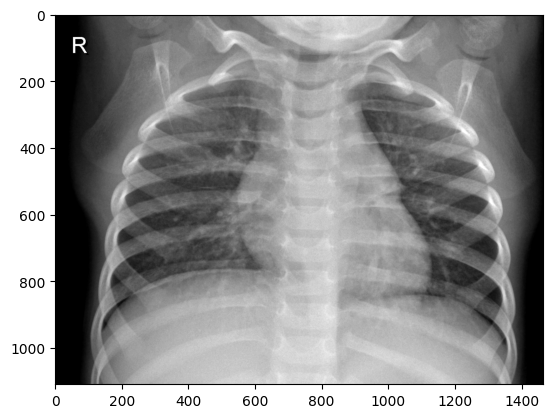

In [4]:
img_2='/content/drive/MyDrive/MY_PROJECT/DL Project/chest-xray-for-covid19-detection/Dataset/Train/Normal/IM-0189-0001.jpeg'
img_2=mpimg.imread(img_2)
print(img_2.shape)
plt.imshow(img_2,cmap="gray")


In [5]:
import cv2
def re_size(x):
    img=mpimg.imread(x)
    resized_image=cv2.resize(img,(150,150,3))
    return(resized_img)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')
valid_gen=ImageDataGenerator(rescale=1./255)

In [7]:
img_width=150
img_height=150
ch=3
image_shape=(img_height,img_width,ch)
train=train_gen.flow_from_directory(train_dir,target_size=[150,150],color_mode='rgb',batch_size=16,class_mode='binary',shuffle=True)
valid=valid_gen.flow_from_directory(test_dir,target_size=[150,150],color_mode='rgb',batch_size=16,class_mode='binary',shuffle=True)

Found 288 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [8]:
import tensorflow as tf
model=tf.keras.Sequential([
                          tf.keras.layers.Conv2D(32,(3,3),input_shape=image_shape,activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128,activation='relu'),
                          tf.keras.layers.Dense(1,activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)


In [10]:
epochs=50

history=model.fit(train,epochs=50,validation_data=valid,callbacks=[early_stop])

Epoch 1/50
18/18 [==============================] - 65s 3s/step - loss: 0.4805 - accuracy: 0.7431 - val_loss: 0.3285 - val_accuracy: 0.8833
Epoch 2/50
18/18 [==============================] - 9s 483ms/step - loss: 0.2709 - accuracy: 0.8819 - val_loss: 0.1697 - val_accuracy: 0.9333
Epoch 3/50
18/18 [==============================] - 10s 521ms/step - loss: 0.2133 - accuracy: 0.9306 - val_loss: 0.1388 - val_accuracy: 0.9500
Epoch 4/50
18/18 [==============================] - 10s 541ms/step - loss: 0.1781 - accuracy: 0.9375 - val_loss: 0.1001 - val_accuracy: 0.9500
Epoch 5/50
18/18 [==============================] - 10s 546ms/step - loss: 0.1946 - accuracy: 0.9375 - val_loss: 0.1507 - val_accuracy: 0.9500
Epoch 6/50
18/18 [==============================] - 9s 488ms/step - loss: 0.1615 - accuracy: 0.9375 - val_loss: 0.1053 - val_accuracy: 0.9667
Epoch 7/50
18/18 [==============================] - 9s 478ms/step - loss: 0.1760 - accuracy: 0.9375 - val_loss: 0.1699 - val_accuracy: 0.9667
Epoch

4/4 [==============================] - 2s 344ms/step


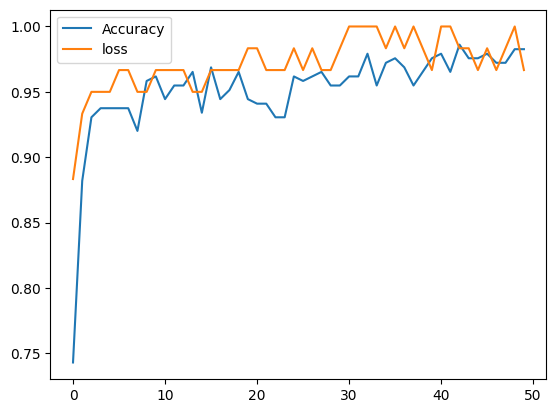

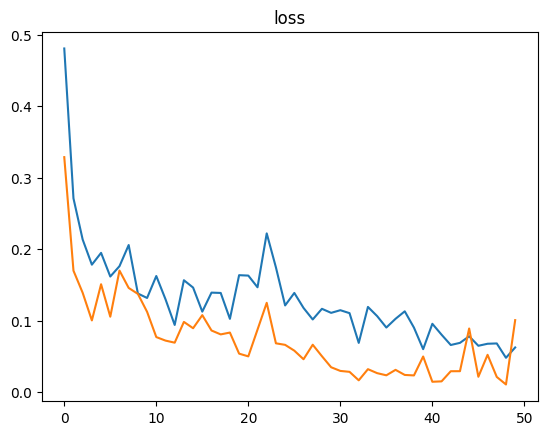

In [12]:
prediction=model.predict(valid)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(acc,label='Accuracy')
plt.plot(val_acc,label='loss')
plt.legend()
plt.figure(num=2)
plt.title('loss')
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')